# Join and Pre-Process the New York City Datasets

Code responsible to Join and Pre-Process three New York City datasets:

- Crimes

In [1]:
import pandas as pd

In [2]:
df_crimes = pd.read_table("Input/NYPD_Complaint_Data_Historic.csv", sep = ',')
df_crimes.head(5)

/usr/lib/python3.7/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CMPLNT_NUM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,RPT_DT,KY_CD,OFNS_DESC,PD_CD,PD_DESC,...,ADDR_PCT_CD,LOC_OF_OCCUR_DESC,PREM_TYP_DESC,PARKS_NM,HADEVELOPT,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon
0,101109527,12/31/2015,23:45:00,NaN,NaN,12/31/2015,113,FORGERY,729.0,"FORGERY,ETC.,UNCLASSIFIED-FELO",...,44.0,INSIDE,BAR/NIGHT CLUB,NaN,NaN,1007314.0,241257.0,40.828848,-73.916661,"(40.828848333, -73.916661142)"
1,153401121,12/31/2015,23:36:00,NaN,NaN,12/31/2015,101,MURDER & NON-NEGL. MANSLAUGHTER,NaN,NaN,...,103.0,OUTSIDE,NaN,NaN,NaN,1043991.0,193406.0,40.697338,-73.784557,"(40.697338138, -73.784556739)"
2,569369778,12/31/2015,23:30:00,NaN,NaN,12/31/2015,117,DANGEROUS DRUGS,503.0,"CONTROLLED SUBSTANCE,INTENT TO",...,28.0,NaN,OTHER,NaN,NaN,999463.0,231690.0,40.802607,-73.945052,"(40.802606608, -73.945051911)"
3,968417082,12/31/2015,23:30:00,NaN,NaN,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,105.0,INSIDE,RESIDENCE-HOUSE,NaN,NaN,1060183.0,177862.0,40.654549,-73.726339,"(40.654549444, -73.726338791)"
4,641637920,12/31/2015,23:25:00,12/31/2015,23:30:00,12/31/2015,344,ASSAULT 3 & RELATED OFFENSES,101.0,ASSAULT 3,...,13.0,FRONT OF,OTHER,NaN,NaN,987606.0,208148.0,40.738002,-73.987891,"(40.7380024, -73.98789129)"


In [3]:
removed_columns = ['CMPLNT_NUM', 'PD_DESC', 'PD_CD', 'Lat_Lon', 'X_COORD_CD', 'Y_COORD_CD',
                   'KY_CD', 'ADDR_PCT_CD', 'LOC_OF_OCCUR_DESC', 'PARKS_NM', 'HADEVELOPT', 
                   'CMPLNT_TO_TM', 'CMPLNT_FR_TM', 'JURIS_DESC', 'PREM_TYP_DESC']

df_crimes.drop(removed_columns, axis = 1, inplace = True)
new_names = {'CMPLNT_FR_DT': 'Event Date', 'CMPLNT_TO_DT': 'Event Ending Date', 'RPT_DT': 'Event Report Date', 
             'OFNS_DESC': 'Description', 'CRM_ATPT_CPTD_CD': 'Attempt Complete', 'LAW_CAT_CD': 'Level of Offense',
             'BORO_NM': 'Borough'}

df_crimes.rename(columns = new_names, inplace = True)
df_crimes.head(5)

,Event Date,Event Ending Date,Event Report Date,Description,Attempt Complete,Level of Offense,Borough,Latitude,Longitude
0,12/31/2015,NaN,12/31/2015,FORGERY,COMPLETED,FELONY,BRONX,40.828848,-73.916661
1,12/31/2015,NaN,12/31/2015,MURDER & NON-NEGL. MANSLAUGHTER,COMPLETED,FELONY,QUEENS,40.697338,-73.784557
2,12/31/2015,NaN,12/31/2015,DANGEROUS DRUGS,COMPLETED,FELONY,MANHATTAN,40.802607,-73.945052
3,12/31/2015,NaN,12/31/2015,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,QUEENS,40.654549,-73.726339
4,12/31/2015,12/31/2015,12/31/2015,ASSAULT 3 & RELATED OFFENSES,COMPLETED,MISDEMEANOR,MANHATTAN,40.738002,-73.987891


In [4]:
import geopandas
from shapely.geometry import Point
import matplotlib.pyplot as plt

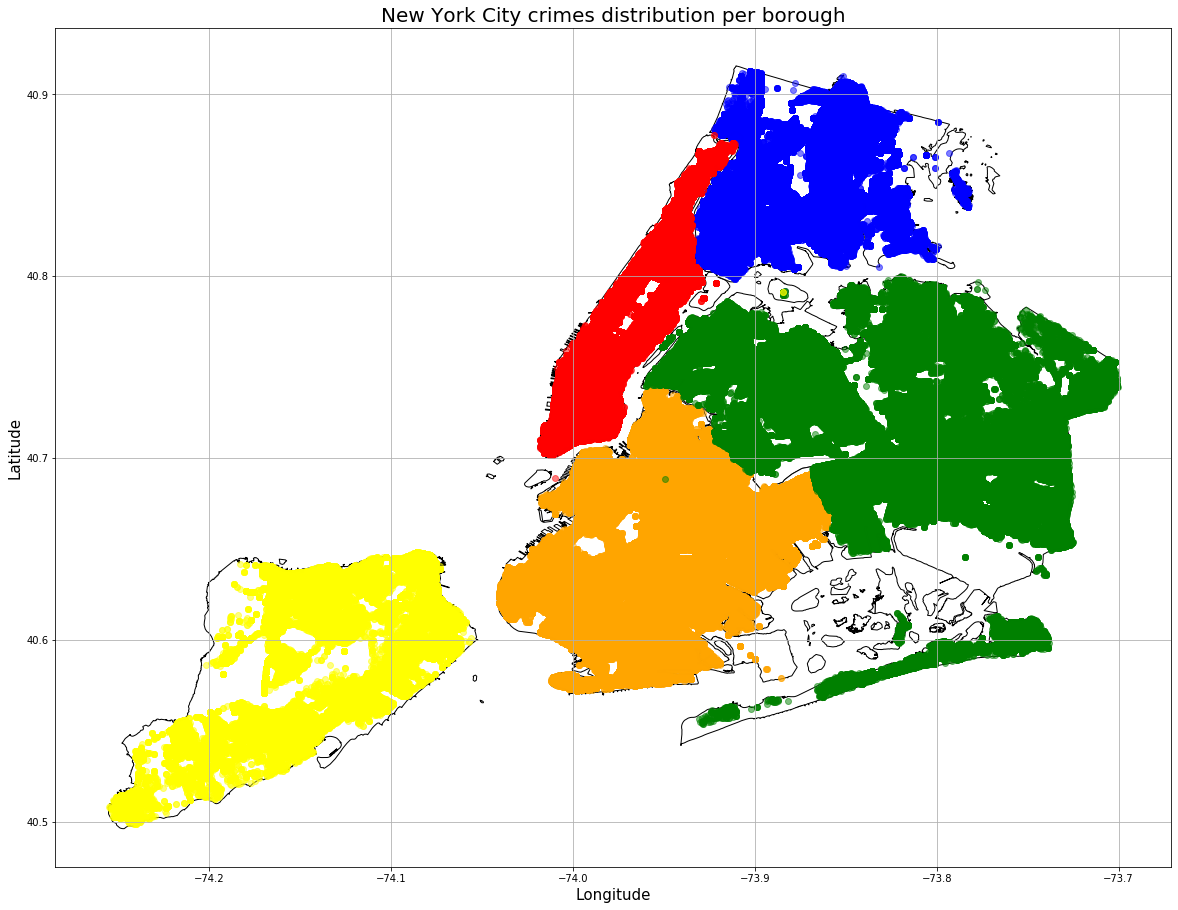

In [7]:
def crimes_evaluation(df_crimes):
    colors = ['Blue', 'Orange', 'Red', 'Green', 'Yellow']
    
    fig, ax = plt.subplots(figsize=(20, 20))
    world = geopandas.read_file(geopandas.datasets.get_path("nybb")) # open new york city map
    world.to_crs({"init": "epsg:4326"}).plot(ax=ax, color="white", edgecolor="black")
    boroughs = sorted(set(df_crimes['Borough']))

    for index, borough  in enumerate(boroughs):

        df_borough = df_crimes.loc[df_crimes['Borough'] == borough]
        x = df_borough['Longitude']
        y = df_borough['Latitude']

        geometry = [Point(xy) for xy in zip(x, y)]        
        geo_df = geopandas.GeoDataFrame(df_borough, geometry=geometry)

        plt.scatter(x, y, color=colors[index], alpha=0.5)
    
    plt.title("New York City crimes distribution per borough", fontsize = 20)
    plt.grid(True)
    plt.xlabel("Longitude", fontsize = 15)
    plt.ylabel("Latitude", fontsize = 15)

crimes_evaluation(df_crimes)

### Calculating optimal grid sizes:

- I will use this to define the size of grids for evaluation

- What evaluation ?

Calculating the optmial size of the grids $\sqrt(2\frac{A}{n})$, where:
- l is the size of grid cell
- A is the study área
- n is the number of points within the area

In [9]:
df_crimes.to_csv("Output/crimes_data.csv", sep = ',', index = False)